In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from poola import core as pool
from scipy import stats
import matplotlib as mpl
import gpplot as gpp
import seaborn as sns
gpp.set_aesthetics()

pd.set_option('display.max_columns', None)

## Intron disrupting hygromycin resistance (flow)

In [16]:
hygro = pd.read_excel('../../required_data/Primary screen/presence_vs_activity.xlsx', sheet_name='Hygro')
hygro

,sgRNA,Condition,% APC-,% APC+
0,ABE sg1,Presence,59.1,40.9
1,ABE sg1,Activity,90.8,9.2
2,ABE sg2,Presence,59.1,40.9
3,ABE sg2,Activity,89.0,11.0
4,CBE sg1,Presence,64.0,36.0
5,CBE sg1,Activity,90.3,9.7
6,CBE sg2,Presence,64.0,36.0
7,CBE sg2,Activity,91.9,8.1


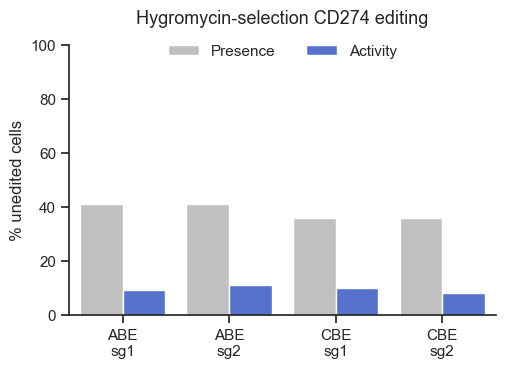

In [17]:
fig, ax = plt.subplots()
colors = {'Presence':'silver', "Activity": 'royalblue'}
ax = sns.barplot(data=hygro, x="sgRNA", y="% APC+", hue='Condition', palette=colors)
ax.set_ylim(0, 100)
ax.set_xticks(ticks=[0,1,2,3],
               labels=["ABE\nsg1",'ABE\nsg2', "CBE\nsg1",'CBE\nsg2'])
fig.set_size_inches(5.5, 3.5)
ax.set_ylabel("% unedited cells")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 0.9), ncol=3, title=None, frameon=False,
)
ax.set_xlabel("")
ax.set_title("Hygromycin-selection CD274 editing",fontsize=13, y=1.05)
sns.despine()

## Endogenous splicing with intron disrupting GFP (flow)

In [18]:
endogenous = pd.read_excel('../../required_data/Primary screen/presence_vs_activity.xlsx', sheet_name='Endogenous_splicing')
endogenous

,sgRNA,Condition,GFP+
0,ABE sg1,+ BE,31.10
1,ABE sg1,- BE,0.00
2,ABE sg2,+ BE,26.90
3,ABE sg2,- BE,0.96
4,CBE sg1,+ BE,56.20
5,CBE sg1,- BE,0.00
6,CBE sg2,+ BE,56.10
7,CBE sg2,- BE,0.32


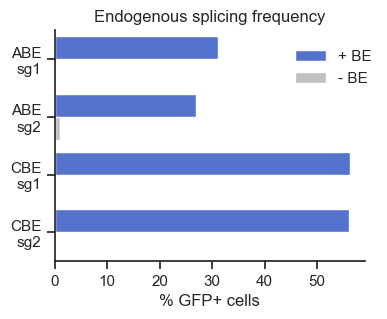

In [19]:
fig, ax = plt.subplots()
colors = {'- BE':'silver', "+ BE": 'royalblue'}
ax = sns.barplot(data=endogenous, y="sgRNA", x="GFP+", hue='Condition', palette=colors)
#ax.set_ylim(0, 100)
ax.set_yticks(ticks=[0,1,2,3],
               labels=["ABE\nsg1",'ABE\nsg2', "CBE\nsg1",'CBE\nsg2'])
fig.set_size_inches(4, 3)
ax.set_xlabel("% GFP+ cells")
ax.set_ylabel("")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.9, 0.7), ncol=1, title=None, frameon=False,
)
ax.set_title("Endogenous splicing frequency",fontsize=12)
sns.despine()

## SpRY-Cas9 (flow)

In [20]:
spry = pd.read_excel('../../required_data/Primary screen/presence_vs_activity.xlsx', sheet_name='SpRY')
spry

,sgRNA,Condition,% APC-,% APC+
0,ABE sg1,Presence,6.31,93.69
1,ABE sg2,Presence,6.67,93.33
2,ABE sg1,Activity,16.70,83.30
3,ABE sg2,Activity,15.80,84.20
4,CBE sg1,Presence,13.80,86.20
5,CBE sg2,Presence,14.90,85.10
6,CBE sg1,Activity,14.10,85.90
7,CBE sg2,Activity,13.30,86.70


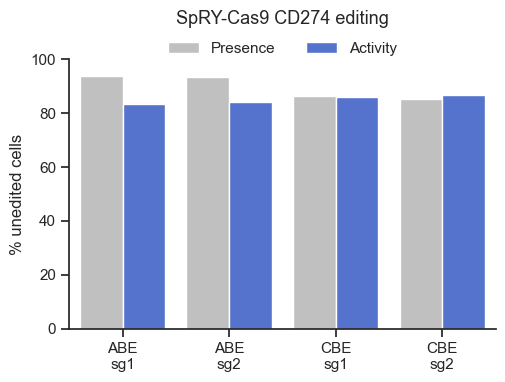

In [21]:
fig, ax = plt.subplots()
colors = {'Presence':'silver', "Activity": 'royalblue'}
ax = sns.barplot(data=spry, x="sgRNA", y="% APC+", hue='Condition', palette=colors)
ax.set_ylim(0, 100)
ax.set_xticks(ticks=[0,1,2,3],
               labels=["ABE\nsg1", "ABE\nsg2", "CBE\nsg1",
                       "CBE\nsg2"])
fig.set_size_inches(5.5, 3.5)
ax.set_ylabel("% unedited cells")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 0.96), ncol=3, title=None, frameon=False,
)
ax.set_xlabel("")
ax.set_title("SpRY-Cas9 CD274 editing", y=1.1, fontsize=13)
sns.despine()

## Primary screen sgRNA validation (flow)

In [22]:
abe = pd.read_excel('../../required_data/Primary screen/presence_vs_activity.xlsx', sheet_name='Validation ABE')
cbe = pd.read_excel('../../required_data/Primary screen/presence_vs_activity.xlsx', sheet_name='Validation CBE')
abe

,sgRNA,Condition,% APC-,% APC+
0,Control,Control,14.9,85.1
1,sg1,Presence,58.5,41.5
2,sg1,Activity,90.1,9.9
3,sg2,Presence,54.0,46.0
4,sg2,Activity,83.4,16.6
5,sg3,Presence,53.4,46.6
6,sg3,Activity,79.4,20.6
7,sg4,Presence,58.5,41.5
8,sg4,Activity,89.7,10.3
9,sg5,Presence,56.8,43.2


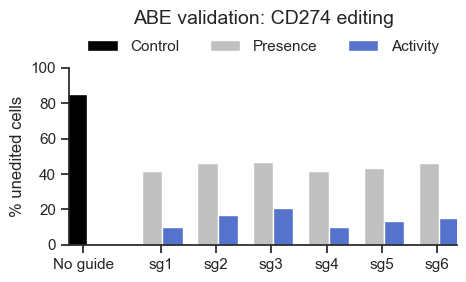

In [23]:
fig, ax = plt.subplots()
colors = {'Presence':'silver', "Activity": 'royalblue', 'Control': 'black'}
ax = sns.barplot(data=abe, x="sgRNA", y="% APC+", hue='Condition', palette=colors,
                order=["Control","sg1", "sg2", "sg3", 'sg4', 'sg5', 'sg6'], width=1.1)
ax.set_ylim(0, 100)
ax.set_xticks(ticks=[-0.25,1.15,2.15,3.15, 4.15, 5.15, 6.15],
               labels=['No guide',"sg1", "sg2", "sg3",'sg4','sg5','sg6'])
fig.set_size_inches(5, 2.3)
ax.set_ylabel("% unedited cells")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1.), ncol=3, title=None, frameon=False,
)
ax.set_xlabel("")
ax.set_title("ABE validation: CD274 editing", fontsize=14, y=1.2)

sns.despine()

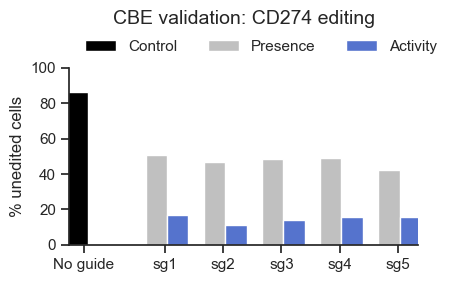

In [24]:
fig, ax = plt.subplots()
colors = {'Presence':'silver', "Activity": 'royalblue', 'Control': 'black'}
ax = sns.barplot(data=cbe, x="sgRNA", y="% APC+", hue='Condition', palette=colors, width=1.1)
ax.set_ylim(0, 100)
ax.set_xticks(ticks=[-0.25,1.15,2.15,3.15, 4.15, 5.15],
               labels=['No guide',"sg1", "sg2", "sg3",'sg4','sg5'])
fig.set_size_inches(4.5,2.3)
ax.set_ylabel("% unedited cells")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, -0.5), ncol=3, title=None, frameon=False,
)
ax.set_xlabel("")
ax.set_title("CBE validation: CD274 editing", fontsize=14, y=1.2)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.55, 1), ncol=3, title=None, frameon=False,
)
sns.despine()

## Validation ABE/CBE (Sanger)

Sanger data has been processed with EditR (http://baseeditr.com/).

In [26]:
sanger = pd.read_excel('../../required_data/Primary screen/presence_vs_activity.xlsx', sheet_name='Validation_Sanger')
sanger

,Guide,Edit,Edited %
0,sg1 A4>G,A4>G,88
1,sg2 A4>G,A4>G,82
2,sg3 A4>G,A4>G,79
3,sg4 A4>G,A4>G,88
4,sg5 A4>G,A4>G,86
5,sg6 A4>G,A4>G,84
6,sg1 C5>T,C5>T,24
7,sg2 C5>T,C5>T,28
8,sg3 C5>T,C5>T,25
9,sg4 C5>T,C5>T,24


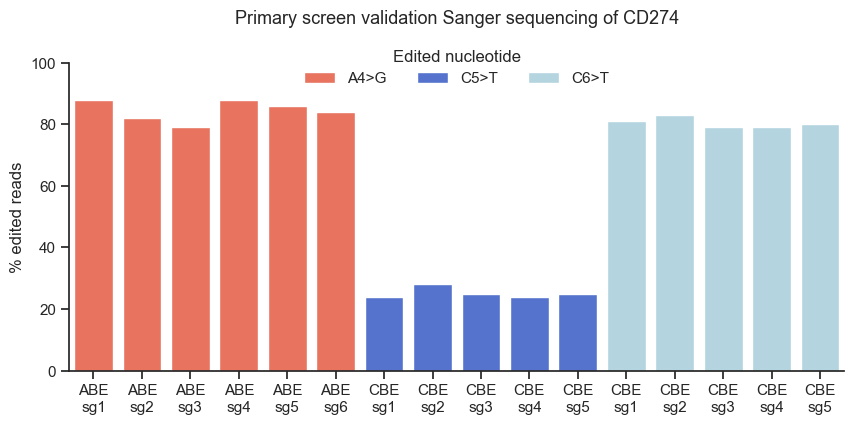

In [27]:
fig, ax = plt.subplots()
colors = {'A4>G':'tomato', "C5>T": 'royalblue',"C6>T": 'lightblue'}
ax = sns.barplot(data=sanger, x="Guide", y="Edited %", hue='Edit', palette=colors, dodge=False)
ax.set_ylim(0, 100)
ax.set_xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
               labels=["ABE\nsg1", "ABE\nsg2", "ABE\nsg3","ABE\nsg4","ABE\nsg5","ABE\nsg6",
                       "CBE\nsg1", "CBE\nsg2", "CBE\nsg3","CBE\nsg4","CBE\nsg5",
                       "CBE\nsg1", "CBE\nsg2", "CBE\nsg3","CBE\nsg4","CBE\nsg5"])
#ax.set_xticks(ticks=[2.5,8,13],
               #labels=["ABE sg1-6","CBE sg1-5","CBE sg1-5"])
fig.set_size_inches(10,4)
ax.set_ylabel("% edited reads")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 0.88), ncol=3, title='Edited nucleotide', frameon=False,
)
ax.set_xlabel("")
ax.set_title("Primary screen validation Sanger sequencing of CD274", y=1.1, fontsize=13)
sns.despine()

## SpRY self-editing (Sanger)

Sanger data has been processed with EditR (http://baseeditr.com/).

In [8]:
self = pd.read_excel('../../required_data/Primary screen/presence_vs_activity.xlsx', sheet_name='SpRY-self-editing')
self

,Edit,Condition,% edited,Rep A,Rep B
0,A4,SpG-Cas9,28.5,29,28
1,A4,SpRY-Cas9,87.5,88,87
2,C5,SpG-Cas9,0.0,0,0
3,C5,SpRY-Cas9,73.5,80,67
4,C6,SpG-Cas9,38.0,28,48
5,C6,SpRY-Cas9,86.0,84,88
6,C10,SpG-Cas9,0.0,0,0
7,C10,SpRY-Cas9,63.5,62,65
8,A11,SpG-Cas9,1.0,2,0
9,A11,SpRY-Cas9,64.5,65,64


In [9]:
selfediting_long = pd.melt(
    self,
    id_vars=['Edit', 'Condition', '% edited'],
    value_vars=['Rep A', 'Rep B'],
    var_name='Replicate',
    value_name='Value')

/var/folders/d_/386377gs0gn39k81sn39v7y40000gq/T/ipykernel_42694/2265848841.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=self, x="Edit", y="% edited", hue='Condition', palette=colors, ci=None)


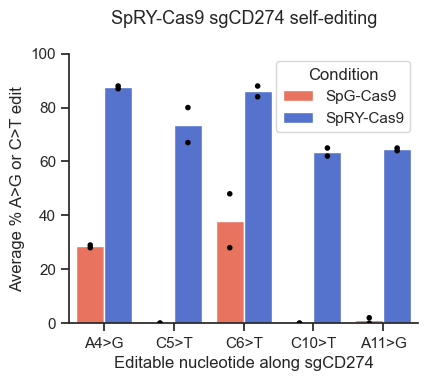

In [13]:
fig, ax = plt.subplots()
colors = {'SpRY-Cas9':'royalblue', "SpG-Cas9": 'tomato'}
ax = sns.barplot(data=self, x="Edit", y="% edited", hue='Condition', palette=colors, ci=None)

ax.set_ylim(0, 100)
ax.set_xticks(ticks=[0,1,2,3,4],
               labels=["A4>G", "C5>T",
                       "C6>T", "C10>T", "A11>G"])
fig.set_size_inches(4.5, 3.5)
ax.set_ylabel("Average % A>G or C>T edit")
#ax.legend_.remove()

ax.set_xlabel("Editable nucleotide along sgCD274")
ax.set_title("SpRY-Cas9 sgCD274 self-editing", y=1.08, fontsize=13)
sns.despine()

sns.stripplot(
    data=selfediting_long,
    x="Edit", y="Value", hue="Condition",
    dodge=True, jitter=False, ax=ax,
    marker='o', edgecolor='black', linewidth=2,
    palette=colors, size=2, legend=False)

fig.savefig('../../SpRY.pdf', dpi=1000, bbox_inches='tight', transparent=False)